In [48]:
import pandas as pd
import matplotlib.pyplot as plt
import textstat
import seaborn as sns
from datetime import datetime

SUBREDDIT = 'conspiracy'
filename = f'./data/{SUBREDDIT}_submissions_redditapi.csv'


In [93]:
dataframe = pd.read_csv(filename)
authors = dataframe.groupby('author', as_index=False).size()

Metadata about whole set

In [29]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['total num of submissions'] = pd.Series({'value':len(dataframe)})
metadata.loc['deleted submissions'] = pd.Series({'value':len(dataframe.loc[pd.isna(dataframe['author'])])})
#metadata.loc['deleted submissions'] = pd.Series({'value':len(dataframe.loc[dataframe['self_text'].isin({ "[removed]", "[deleted]"})])})
print('{0:.2f}% of comments were deleted'.format(len(dataframe.loc[pd.isna(dataframe['author'])])/len(dataframe)))
metadata

0.30% of comments were deleted


,value
total num of submissions,7806
deleted submissions,2314


C:\Users\1408\AppData\Local\Temp\ipykernel_13524\3607886345.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(time.index.strftime('%m-%d'), rotation=40, ha='right')


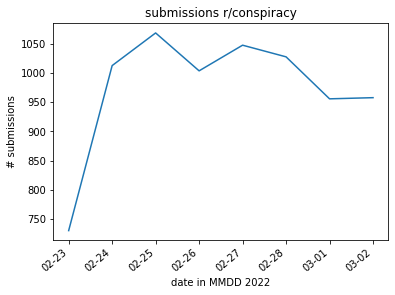

In [115]:
dataframe['date'] = dataframe['time'].apply(datetime.fromtimestamp)
time = dataframe.groupby(pd.Grouper(key='date', axis=0, freq='D')).size()
#plot = plt.plot(time.index, time.values)
ax = sns.lineplot(x=time.index, y=time.values)
ax.set_xticklabels(time.index.strftime('%m-%d'), rotation=40, ha='right')
ax.set(xlabel='date in MMDD 2022', ylabel='# submissions', title=f'submissions r/{SUBREDDIT}')
ax.figure.savefig(f'./images/{SUBREDDIT}_date', bbox_inches='tight')

Metadata about authors

In [30]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['total num of authors'] = pd.Series({'value':len(authors)})
metadata.loc['avg num of submissions'] = pd.Series({'value':'{:.2f}'.format(authors['size'].mean())})
metadata.loc['median num of submissions'] = pd.Series({'value':authors['size'].median()})
metadata


,value
total num of authors,3012
avg num of submissions,1.82
median num of submissions,1.0


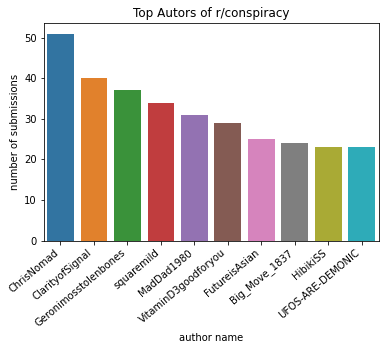

In [36]:
top_authors = authors.nlargest(10, 'size')
ax = sns.barplot(x='author', y='size', data=top_authors)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
ax.set(xlabel='author name', ylabel='number of submissions', title=f'Top Autors of r/{SUBREDDIT}')
ax.figure.savefig(f'./images/{SUBREDDIT}_authors', bbox_inches='tight')


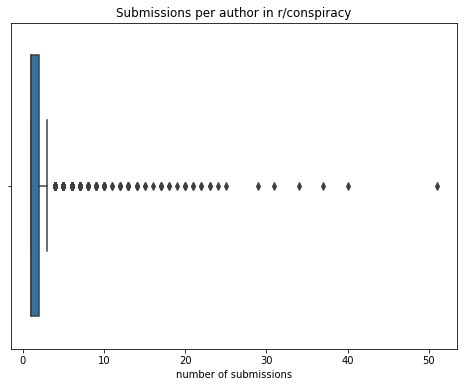

In [40]:
plt.figure(figsize=(8,6))
ax = sns.boxplot(x=authors['size'])
ax.set(xlabel='number of submissions', title=f'Submissions per author in r/{SUBREDDIT}')
plt.savefig(f'./images/{SUBREDDIT}_submissions.png')
plt.show()

Metadata about single submissions

In [32]:
metadata = pd.DataFrame(columns=['value'])
metadata.loc['flesch reading ease score'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.flesch_reading_ease(str(submission)) for submission in dataframe['title']) / len(dataframe))})
metadata.loc['average word count'] = pd.Series({'value':
        '{:.2f}'.format(sum(textstat.lexicon_count(str(submission)) for submission in dataframe['title']) / len(dataframe))})
metadata.loc['average num of comments per sub'] = pd.Series({'value':'{:.2f}'.format(dataframe['num_comments'].mean())})
metadata

,value
flesch reading ease score,69.28
average word count,13.56
average num of comments per sub,26.71


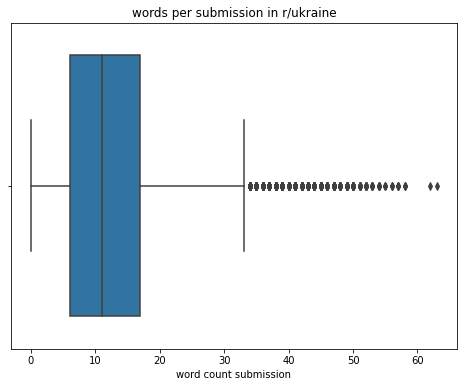

In [41]:
plt.figure(figsize=(8,6))
comment_lengths = [textstat.lexicon_count(str(comment)) for comment in dataframe['title']]
ax = sns.boxplot(x=comment_lengths)
ax.set(xlabel='word count submission', title=f'words per submission in r/{subreddit}')
plt.savefig(f'./images/{subreddit}_words_per_submissions.png')
plt.show()

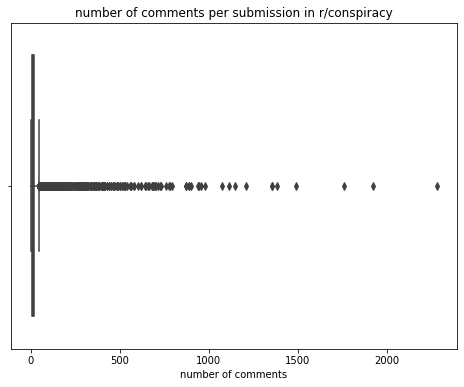

In [43]:
plt.figure(figsize=(8,6))
comment_num = dataframe['num_comments']
ax = sns.boxplot(x=comment_num)
ax.set(xlabel='number of comments', title=f'number of comments per submission in r/{SUBREDDIT}')
plt.savefig(f'./images/{SUBREDDIT}_num_comments.png')
plt.show()